This is a Python-based data analysis and visualization project using the pandas and matplotlib libraries. The code processes Southwest U.S. temperature and precipitation data, then generates plots to visualize the analyzed information.

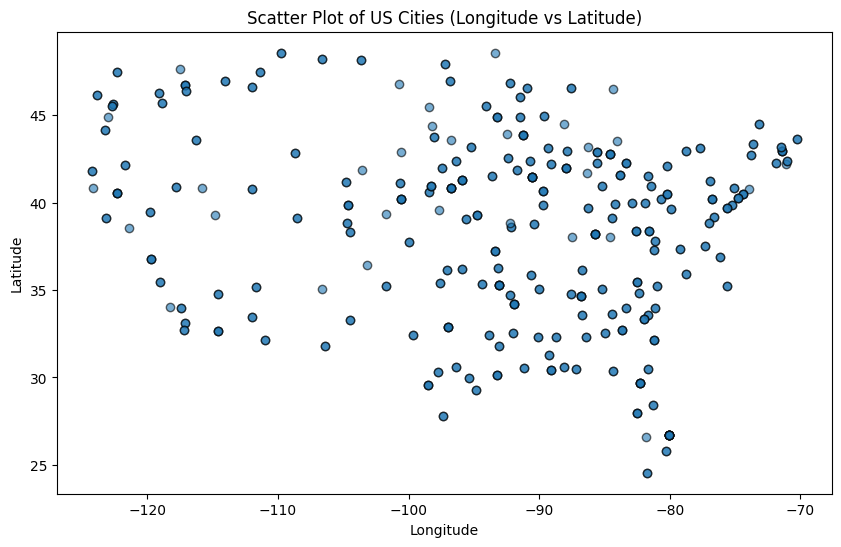

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset
cities = pd.read_csv('city_info.csv')

# Create a scatter plot of the latitude and longitude
plt.figure(figsize=(10, 6))
plt.scatter(cities['Lon'], cities['Lat'], alpha=0.6, edgecolor='black')

# Label the axes and give the plot a title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of US Cities (Longitude vs Latitude)')

# Show the plot
plt.show()

In [2]:
unique_cities_count = cities['Name'].nunique()
print(f"Number of unique cities: {unique_cities_count}")

Number of unique cities: 210


In [3]:
def coordinates_to_region(lat, lon):
    if lat >= 40 and lon >= -100:
        return "Northeast"
    elif lat >= 40 and lon < -100:
        return "Northwest"
    elif lat < 40 and lon >= -100:
        return "Southeast"
    elif lat < 40 and lon < -100:
        return "Southwest"

In [4]:
# Add the 'Region' column
cities['Region'] = cities.apply(lambda row: coordinates_to_region(row['Lat'], row['Lon']), axis=1)

# Display the updated DataFrame
print(cities.head())

   Unnamed: 0      Name           ID      Lat       Lon  \
0           1    Lander  USW00024021  42.8153 -108.7261   
1           2    Lander  USW00024021  42.8153 -108.7261   
2           3  Cheyenne  USW00024018  41.1519 -104.8061   
3           4  Cheyenne  USW00024018  41.1519 -104.8061   
4           5    Wausau  USW00014897  44.9258  -89.6256   

                  Stn.Name  Stn.stDate  Stn.edDate     Region  
0               LANDER WBO  1892-01-01  1946-05-28  Northwest  
1        LANDER HUNT FIELD  1946-05-29  2021-12-31  Northwest  
2             CHEYENNE WBO  1871-01-01  1935-08-31  Northwest  
3  CHEYENNE MUNICIPAL ARPT  1935-09-01  2021-12-31  Northwest  
4     Wausau Record Herald  1896-01-01  1941-12-31  Northeast  


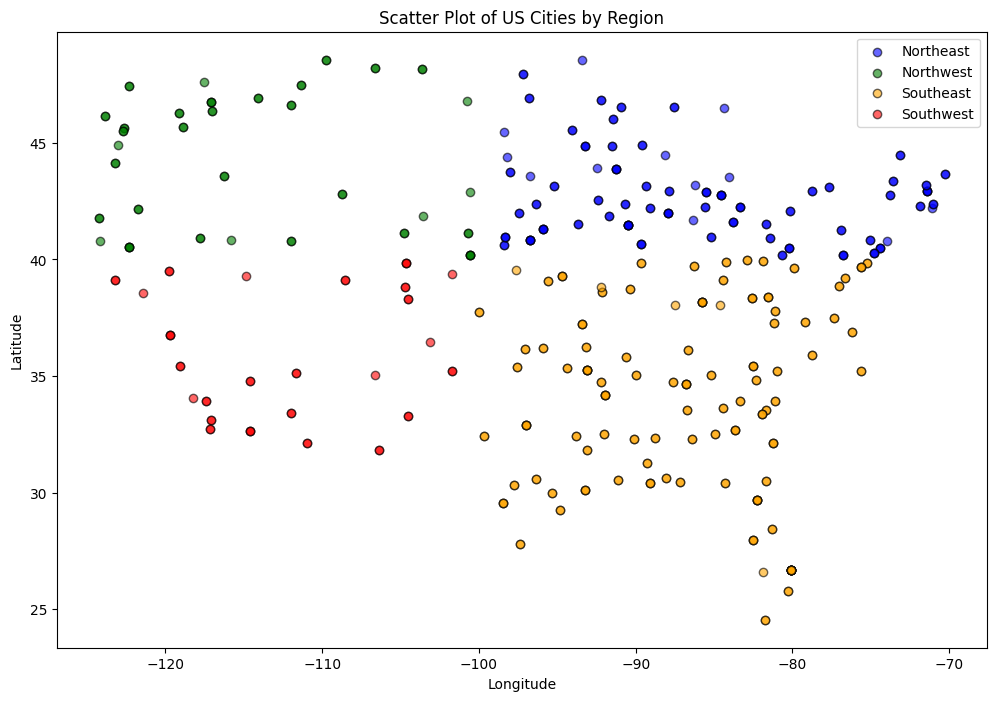

In [5]:
import matplotlib.pyplot as plt

# Create a scatter plot of the cities, colored by region
plt.figure(figsize=(12, 8))
for region, color in zip(["Northeast", "Northwest", "Southeast", "Southwest"], ['blue', 'green', 'orange', 'red']):
    subset = cities[cities['Region'] == region]
    plt.scatter(subset['Lon'], subset['Lat'], label=region, color=color, alpha=0.6, edgecolor='black')

# Label the axes and add a legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of US Cities by Region')
plt.legend()
plt.show()


In [6]:
import numpy as np

# Define the distance function
def distance(lat0, lon0, lat1, lon1):
    return np.sqrt((lat0 - lat1) ** 2 + (lon0 - lon1) ** 2)

# Function to find the nearest city in a different region
def find_nearest_city(row):
    current_region = row['Region']
    other_cities = cities[cities['Region'] != current_region]

    if other_cities.empty:
        return None  # If no cities are found in different regions

    distances = distance(row['Lat'], row['Lon'], other_cities['Lat'].values, other_cities['Lon'].values)
    nearest_index = np.argmin(distances)
    return other_cities.iloc[nearest_index]['Name']

# Create the cities_nearest DataFrame and add the 'Nearest' column
cities_nearest = cities.copy()
cities_nearest['Nearest'] = cities_nearest.apply(find_nearest_city, axis=1)

# Find the nearest city to Cheyenne
cheyenne_nearest = cities_nearest[cities_nearest['Name'] == 'Cheyenne']['Nearest'].values[0]
print(f"The nearest city to Cheyenne is: {cheyenne_nearest}")

The nearest city to Cheyenne is: Denver


In [7]:
import pandas as pd

# Load the Phoenix data from the CSV file
phoenix = pd.read_csv('phoenix.csv')  # Make sure the file path is correct

# Calculate the average maximum and minimum temperatures, rounded to the nearest integer
average_tmax = round(phoenix['tmax'].mean())
average_tmin = round(phoenix['tmin'].mean())

# Find the highest recorded maximum and minimum temperatures
highest_tmax = phoenix['tmax'].max()
lowest_tmin = phoenix['tmin'].min()  # Use min() to get the lowest temperature

# Print the results
print(f"Average maximum temperature: {average_tmax}°F")
print(f"Average minimum temperature: {average_tmin}°F")
print(f"Highest recorded maximum temperature: {highest_tmax}°F")
print(f"Lowest recorded minimum temperature: {lowest_tmin}°F")


Average maximum temperature: 86°F
Average minimum temperature: 59°F
Highest recorded maximum temperature: 122.0°F
Lowest recorded minimum temperature: 16.0°F


In [8]:
# Calculate the number of hot days (tmax > 110 degrees)
number_of_hot_days = (phoenix['tmax'] > 110).sum()

# Calculate the number of cold days (tmin < 32 degrees)
number_of_cold_days = (phoenix['tmin'] < 32).sum()

# Print the results
print(f"The number of hot days (more than 110 degrees) is: {number_of_hot_days}")
print(f"The number of cold days (less than 32 degrees) is: {number_of_cold_days}")

The number of hot days (more than 110 degrees) is: 1056
The number of cold days (less than 32 degrees) is: 739


In [9]:
# Filter the data for the year 2010
phoenix_2010 = phoenix[(phoenix['Date'] >= '2010-01-01') & (phoenix['Date'] <= '2010-12-31')].copy()

# Calculate the temperature range for each day
phoenix_2010.loc[:, 'temp_range'] = phoenix_2010['tmax'] - phoenix_2010['tmin']

# Find the date with the largest temperature range
largest_2010_range_date = phoenix_2010.loc[phoenix_2010['temp_range'].idxmax(), 'Date']

# Get the temperature readings on June 24, 2010
june_24_data = phoenix[phoenix['Date'] == '2010-06-24']
max_temp_june_24 = round(june_24_data['tmax'].values[0])
min_temp_june_24 = round(june_24_data['tmin'].values[0])

# Print the results
print(f"The date with the largest temperature range in 2010 is: {largest_2010_range_date}")
print(f"On June 24, 2010, the maximum temperature was: {max_temp_june_24}°F")
print(f"On June 24, 2010, the minimum temperature was: {min_temp_june_24}°F")

The date with the largest temperature range in 2010 is: 2010-06-24
On June 24, 2010, the maximum temperature was: 113°F
On June 24, 2010, the minimum temperature was: 79°F


In [10]:
# Convert the Date column to datetime format
phoenix['Date'] = pd.to_datetime(phoenix['Date'])

# Add the Year and Month columns
phoenix['Year'] = phoenix['Date'].dt.year  # Year as an integer
phoenix['Month'] = phoenix['Date'].dt.strftime('%m (%b)')  # Month as a string "04 (Apr)"

# Display the updated DataFrame
print(phoenix.head())

   Unnamed: 0       Date  tmax  tmin  prcp  Year     Month
0           1 1896-01-01  66.0  30.0   0.0  1896  01 (Jan)
1           2 1896-01-02  64.0  30.0   0.0  1896  01 (Jan)
2           3 1896-01-03  68.0  30.0   0.0  1896  01 (Jan)
3           4 1896-01-04  69.0  34.0   0.0  1896  01 (Jan)
4           5 1896-01-05  70.0  46.0   0.0  1896  01 (Jan)


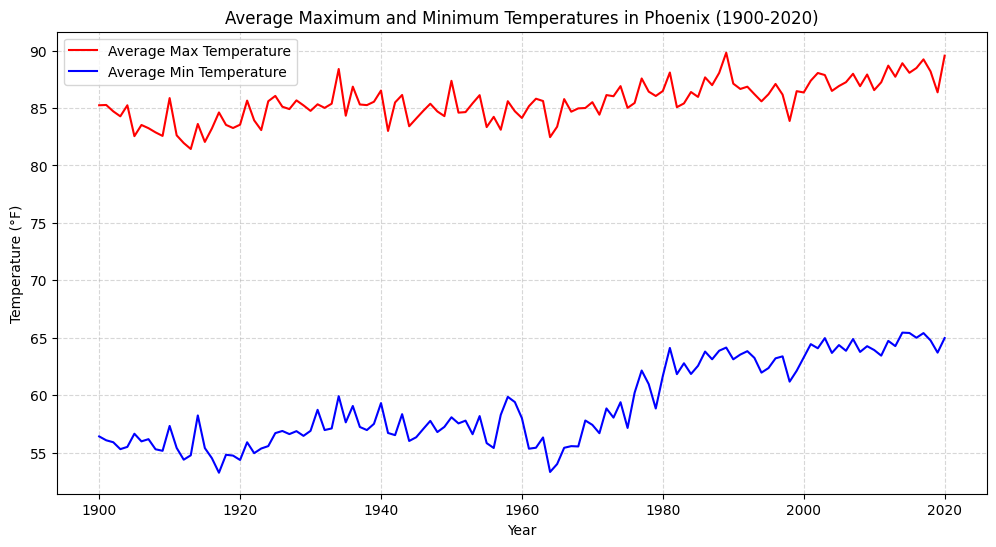

In [11]:
# Filter the data for the years between 1900 and 2020
phoenix_filtered = phoenix[(phoenix['Year'] >= 1900) & (phoenix['Year'] <= 2020)]

# Calculate the average maximum and minimum temperatures for each year
yearly_avg = phoenix_filtered.groupby('Year').agg({'tmax': 'mean', 'tmin': 'mean'}).reset_index()

# Create an overlaid line plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg['Year'], yearly_avg['tmax'], label='Average Max Temperature', color='red')
plt.plot(yearly_avg['Year'], yearly_avg['tmin'], label='Average Min Temperature', color='blue')

# Label the axes and add a title
plt.xlabel('Year')
plt.ylabel('Temperature (°F)')
plt.title('Average Maximum and Minimum Temperatures in Phoenix (1900-2020)')
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

In [12]:
# Make a copy of the phoenix table and extract the month as a string
phoenix_copy = phoenix.copy()
phoenix_copy['Month'] = phoenix_copy['Date'].dt.strftime('%m (%b)')

# Filter data for the past period (1900-1960) and the present period (2019-2021)
past_period = phoenix_copy[(phoenix_copy['Year'] >= 1900) & (phoenix_copy['Year'] <= 1960)]
present_period = phoenix_copy[(phoenix_copy['Year'] >= 2019) & (phoenix_copy['Year'] <= 2021)]

# Calculate the average max temperature for each month in both periods
past_avg = past_period.groupby('Month')['tmax'].mean()
present_avg = present_period.groupby('Month')['tmax'].mean()

# Construct the monthly_increases table
monthly_increases = pd.DataFrame({
    'Month': past_avg.index,
    'Past': past_avg.values,
    'Present': present_avg.values,
    'Increase': present_avg.values - past_avg.values
})

# Identify the month with the largest increase in maximum temperature
largest_increase_month = monthly_increases.loc[monthly_increases['Increase'].idxmax(), 'Month']

# Print the results
print(monthly_increases)
print(f"The month with the largest increase in maximum temperature is: {largest_increase_month}")


       Month        Past     Present  Increase
0   01 (Jan)   65.016393   67.831183  2.814789
1   02 (Feb)   68.848520   69.185882  0.337362
2   03 (Mar)   74.649921   75.979570  1.329649
3   04 (Apr)   82.642077   88.400000  5.757923
4   05 (May)   91.429931   94.570968  3.141036
5   06 (Jun)  101.166120  105.734444  4.568324
6   07 (Jul)  103.598625  107.245161  3.646536
7   08 (Aug)  101.416182  107.383871  5.967689
8   09 (Sep)   97.687432  101.237778  3.550346
9   10 (Oct)   86.797990   90.166667  3.368676
10  11 (Nov)   74.627322   80.517778  5.890455
11  12 (Dec)   65.906399   67.454839  1.548440
The month with the largest increase in maximum temperature is: 08 (Aug)


In [13]:
import pandas as pd

# Load the southwest data from the CSV file
southwest = pd.read_csv('southwest.csv')  # Make sure the file path is correct

# Filter data for the year 1960 and calculate the average precipitation
precipitation_1960 = southwest[southwest['Year'] == 1960]['Total Precipitation']
average_precipitation_1960 = round(precipitation_1960.mean())

# Print the result
print(f"Average precipitation in 1960: {average_precipitation_1960} inches")



Average precipitation in 1960: 12 inches


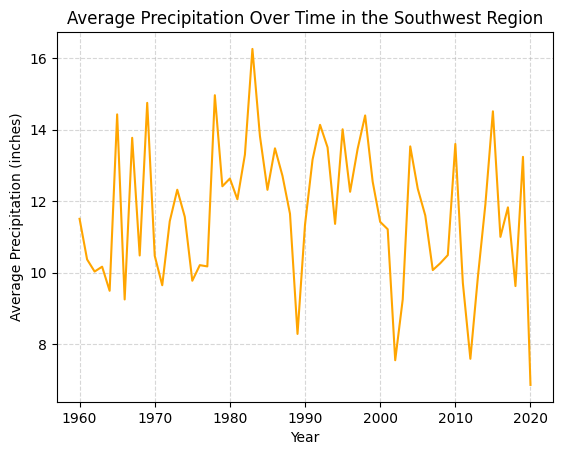

The trend is: decreasing


In [14]:
# Group by year and calculate the average precipitation for each year
average_precipitation_by_year = southwest.groupby('Year')['Total Precipitation'].mean()

# Plot the average precipitation over time
plt.plot(average_precipitation_by_year.index, average_precipitation_by_year.values, color='orange')
plt.xlabel('Year')
plt.ylabel('Average Precipitation (inches)')
plt.title('Average Precipitation Over Time in the Southwest Region')
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

# Determine the trend
trend = 'decreasing' if average_precipitation_by_year.values[-1] < average_precipitation_by_year.values[0] else 'increasing'
print(f"The trend is: {trend}")

In [15]:
# Filtering the data for the years 1960 and 1961
precipitation_1960_total = southwest[southwest['Year'] == 1960]['Total Precipitation'].sum()
precipitation_1961_total = southwest[southwest['Year'] == 1961]['Total Precipitation'].sum()

# Calculating the percentage change
percentage_increase = ((precipitation_1961_total - precipitation_1960_total) / precipitation_1960_total) * 100

# Print the result
print(f"Percentage change in total precipitation from 1960 to 1961: {percentage_increase:.2f}%")


Percentage change in total precipitation from 1960 to 1961: -9.87%


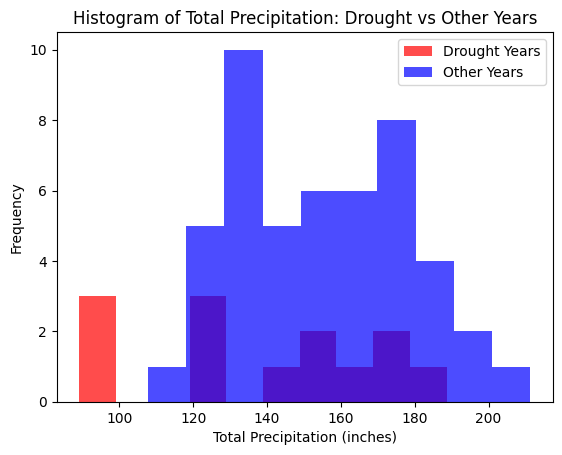

In [16]:
# Define drought years according to the U.S. EPA statement
drought_years = set(range(2002, 2006)) | set(range(2012, 2021))

# Group the data by year and calculate the total precipitation for each year
total_precipitation_by_year = southwest.groupby('Year')['Total Precipitation'].sum()

# Create a DataFrame with 'Year', 'Precipitation', and 'Label' columns
drought = pd.DataFrame({
    'Year': total_precipitation_by_year.index,
    'Precipitation': total_precipitation_by_year.values,
    'Label': ['drought' if year in drought_years else 'other' for year in total_precipitation_by_year.index]
})

# Plot overlaid histograms for drought years and other years
plt.hist(drought[drought['Label'] == 'drought']['Precipitation'], bins=10, alpha=0.7, label='Drought Years', color='red')
plt.hist(drought[drought['Label'] == 'other']['Precipitation'], bins=10, alpha=0.7, label='Other Years', color='blue')
plt.xlabel('Total Precipitation (inches)')
plt.ylabel('Frequency')
plt.title('Histogram of Total Precipitation: Drought vs Other Years')
plt.legend()
plt.show()

In [17]:
# Assuming the drought DataFrame has already been created
# Count the number of times "drought" appears in the Label column
drought_count = drought[drought['Label'] == 'drought'].shape[0]

# Print the results
print(f"Count of 'drought' years: {drought_count}")

Count of 'drought' years: 13


In [18]:
# Function to calculate the observed test statistic
def test_statistic(t):
    drought_mean = t[t['Label'] == 'drought']['Precipitation'].mean()
    other_mean = t[t['Label'] == 'other']['Precipitation'].mean()
    return drought_mean - other_mean

# Calculate the observed test statistic
observed_statistic = round(test_statistic(drought))

# Print the results
print(f"Observed test statistic: {observed_statistic}")

Observed test statistic: -16


In [19]:
# Function to simulate the test statistic under the null hypothesis
def simulate_null(t, num_simulations=5000):
    null_stats = []
    for _ in range(num_simulations):
        shuffled_labels = np.random.permutation(t['Label'])
        shuffled_t = t.copy()
        shuffled_t['Label'] = shuffled_labels
        null_stat = test_statistic(shuffled_t)
        null_stats.append(null_stat)
    return null_stats

# Simulate the null distribution 5000 times
null_distribution = simulate_null(drought)

# Check if the observed statistic is on the left or right tail
test_stat_location = 'left tail' if observed_statistic < np.mean(null_distribution) else 'right tail'
print("Test statistic location:", test_stat_location)



Test statistic location: left tail


In [20]:
import numpy as np

# Function to simulate the test statistic under the null hypothesis with more simulations for stability
def simulate_null(t, num_simulations=5000):
    null_stats = []
    for _ in range(num_simulations):
        shuffled_labels = np.random.permutation(t['Label'])
        shuffled_t = t.copy()
        shuffled_t['Label'] = shuffled_labels
        null_stat = test_statistic(shuffled_t)
        null_stats.append(null_stat)
    return null_stats

# Simulate the null distribution with more repetitions
null_distribution = simulate_null(drought)

# Calculate the p-value again
p_value = np.mean(np.array(null_distribution) <= observed_statistic)
print(f"P-value: {p_value:.2f}")


P-value: 0.02
